#### Exploratory Data Analysis of Rating of the Independent School Districts in Texas.

`This is a group project, we are working on serveral variables. I am working on the Student to teacher ratio (ptr) and total enrolment (total females enrolled and total males enrolled)`

Our Dependent variable is Mean Rating of the School

In [32]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
     - -------------------------------------- 0.2/9.2 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 3.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.2 MB 4.4 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/9.2 MB 6.9 MB/s eta 0:00:02
     --------------- ------------------------ 3.6/9.2 MB 12.8 MB/s eta 0:00:01
     --------------------------------- ------ 7.7/9.2 MB 23.5 MB/s eta 0:00:01
     ------------------------------------- -- 8.6/9.2 MB 23.0 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 21.7 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 20.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/233.8 kB ? eta -


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing the data
data = pd.read_csv('dataset.csv')
# data = data.drop(['TOT_ENR_M', 'TOT_ENR_F'], axis=1)
data.head()

,ptr,TOT_ENR_M,TOT_ENR_F,TOT_ENR,Mean_rating
0,6.277778,58.0,52.0,110.0,2.750000
1,10.587399,252.0,181.0,433.0,2.625000
2,15.129703,5676.0,5242.0,10918.0,3.000000
3,10.338346,61.0,76.0,137.0,2.875000
4,10.902941,195.0,222.0,417.0,2.428571


#### Basic Information about the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ptr          1020 non-null   float64
 1   TOT_ENR_M    1020 non-null   float64
 2   TOT_ENR_F    1020 non-null   float64
 3   TOT_ENR      1020 non-null   float64
 4   Mean_rating  1020 non-null   float64
dtypes: float64(5)
memory usage: 40.0 KB


In [4]:
data.describe()

,ptr,TOT_ENR_M,TOT_ENR_F,TOT_ENR,Mean_rating
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,12.724380,2545.966667,2409.072549,4955.039216,3.204280
std,2.493322,7152.729136,6819.987053,13972.312388,0.539454
min,4.070981,10.000000,10.000000,20.000000,1.750000
25%,11.012754,195.750000,190.500000,385.500000,2.875000
50%,12.769690,509.500000,460.500000,971.500000,3.250000
75%,14.688600,1611.250000,1512.500000,3104.250000,3.625000
max,21.200001,109666.000000,106323.000000,215989.000000,4.000000


##### `Scatter Plot for Each Variable`

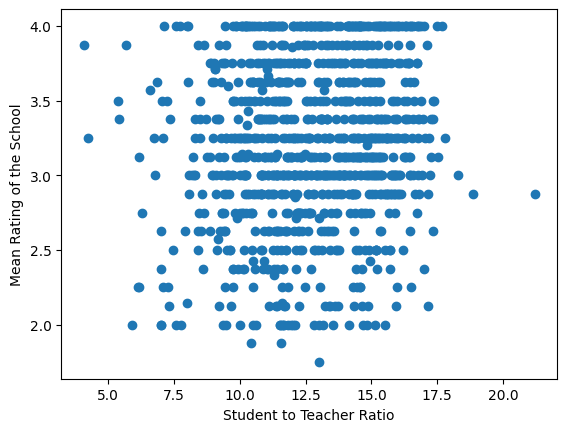

In [5]:
# Student to Teacher Ratio
ptr = data['ptr']
rating = data['Mean_rating']

plt.scatter(ptr, rating)
plt.xlabel("Student to Teacher Ratio")
plt.ylabel("Mean Rating of the School")
plt.show()

There is no clear linear relation between the two variables.

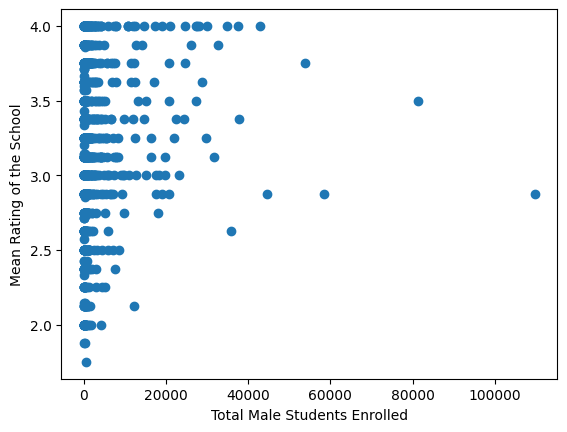

In [11]:
# Male Students 
male_students = data['TOT_ENR_M']

plt.scatter(male_students, rating)
plt.xlabel("Total Male Students Enrolled")
plt.ylabel("Mean Rating of the School")
plt.show()

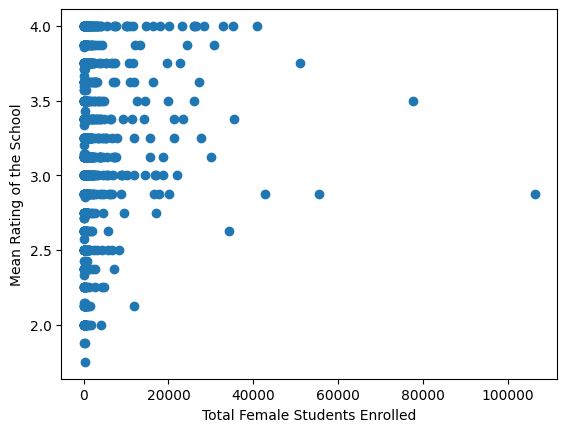

In [12]:
# Female Students 
female_students = data['TOT_ENR_F']

plt.scatter(female_students, rating)
plt.xlabel("Total Female Students Enrolled")
plt.ylabel("Mean Rating of the School")
plt.show()

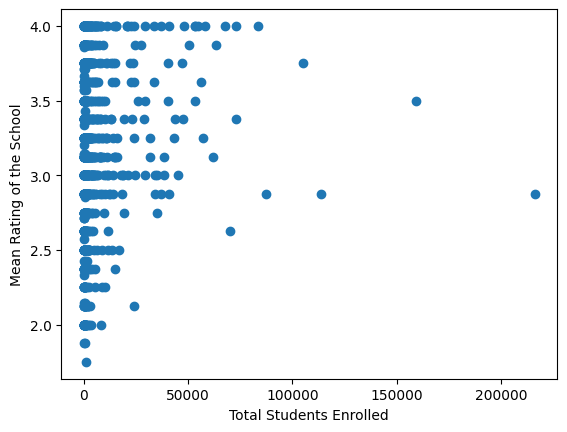

In [13]:
# Total Students 
total_students = data['TOT_ENR']

plt.scatter(total_students, rating)
plt.xlabel("Total Students Enrolled")
plt.ylabel("Mean Rating of the School")
plt.show()

In [6]:
# Checking the correlation between the two variables
data.corr()

,ptr,TOT_ENR_M,TOT_ENR_F,TOT_ENR,Mean_rating
ptr,1.000000,0.379882,0.377768,0.378861,0.127334
TOT_ENR_M,0.379882,1.000000,0.999884,0.999972,0.101324
TOT_ENR_F,0.377768,0.999884,1.000000,0.999970,0.100255
TOT_ENR,0.378861,0.999972,0.999970,1.000000,0.100805
Mean_rating,0.127334,0.101324,0.100255,0.100805,1.000000


<AxesSubplot: >

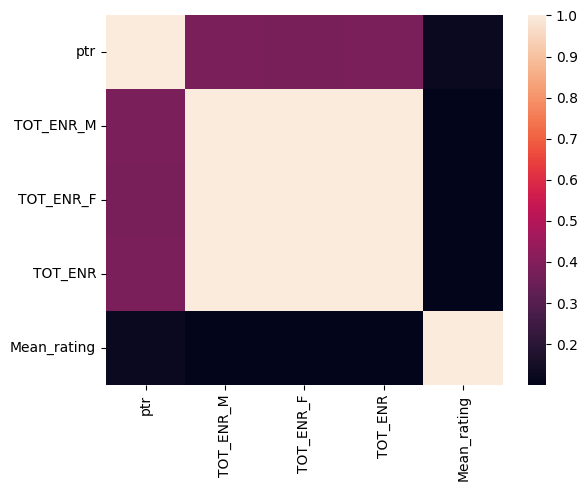

In [7]:
# Plotting the correlation in a heatmap
sns.heatmap(data.corr())

##### `Box Plot for Each Variable`

<AxesSubplot: >

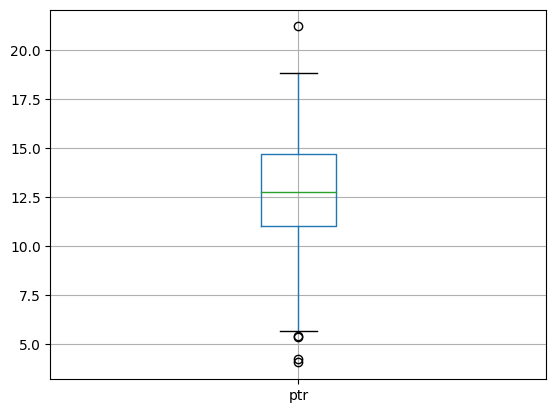

In [14]:
# Student to Teacher Ratio
data[['ptr']].boxplot()

<AxesSubplot: >

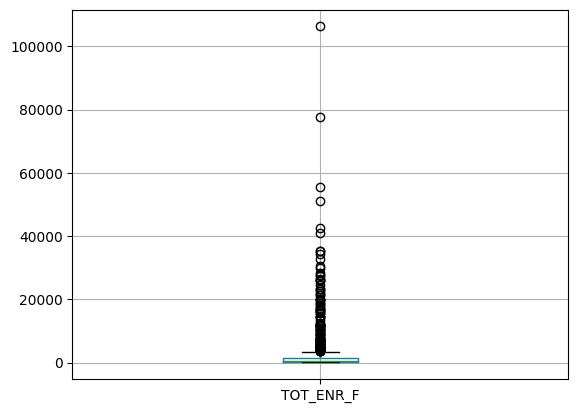

In [18]:
# Female student enrolment
data[['TOT_ENR_F']].boxplot()

<AxesSubplot: >

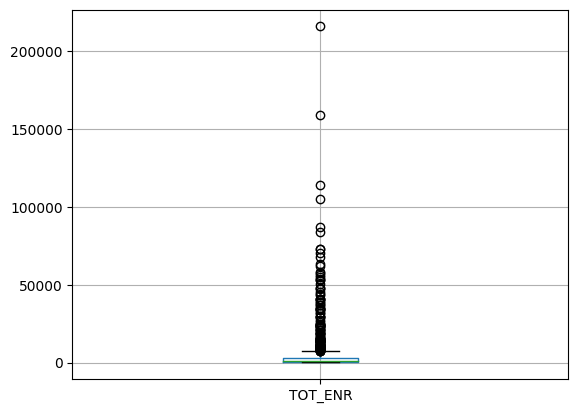

In [19]:
# Total student enrolment
data[['TOT_ENR']].boxplot()

<AxesSubplot: >

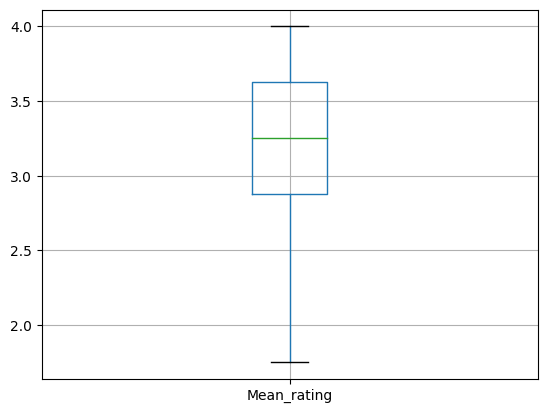

In [20]:
# Male student enrolment
data[['Mean_rating']].boxplot()

#### `Histogram Plot for Each Variable`

(array([ 2.,  0.,  3.,  5.,  4., 13., 10., 17., 23., 46., 57., 69., 81.,
        91., 74., 73., 66., 80., 78., 85., 64., 42., 23., 10.,  2.,  1.,
         0.,  0.,  0.,  1.]),
 array([ 4.070981  ,  4.64194833,  5.21291567,  5.783883  ,  6.35485033,
         6.92581767,  7.496785  ,  8.06775233,  8.63871967,  9.209687  ,
         9.78065433, 10.35162167, 10.922589  , 11.49355633, 12.06452367,
        12.635491  , 13.20645833, 13.77742567, 14.348393  , 14.91936033,
        15.49032767, 16.061295  , 16.63226233, 17.20322967, 17.774197  ,
        18.34516433, 18.91613167, 19.487099  , 20.05806633, 20.62903367,
        21.200001  ]),
 <BarContainer object of 30 artists>)

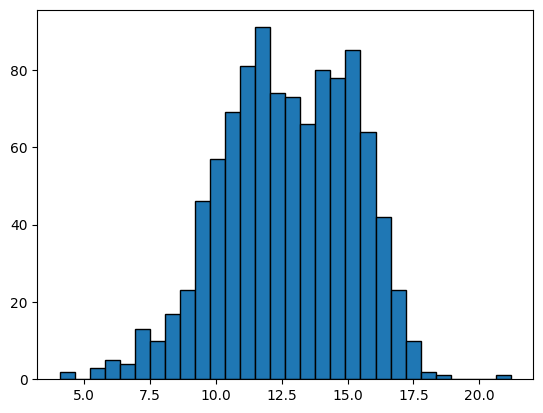

In [26]:
# Student to Teacher Ratio
plt.hist(data['ptr'], edgecolor='black', bins=30)

(array([881.,  58.,  22.,  13.,  12.,   8.,   6.,   6.,   4.,   2.,   2.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+01, 3.665200e+03, 7.320400e+03, 1.097560e+04,
        1.463080e+04, 1.828600e+04, 2.194120e+04, 2.559640e+04,
        2.925160e+04, 3.290680e+04, 3.656200e+04, 4.021720e+04,
        4.387240e+04, 4.752760e+04, 5.118280e+04, 5.483800e+04,
        5.849320e+04, 6.214840e+04, 6.580360e+04, 6.945880e+04,
        7.311400e+04, 7.676920e+04, 8.042440e+04, 8.407960e+04,
        8.773480e+04, 9.139000e+04, 9.504520e+04, 9.870040e+04,
        1.023556e+05, 1.060108e+05, 1.096660e+05]),
 <BarContainer object of 30 artists>)

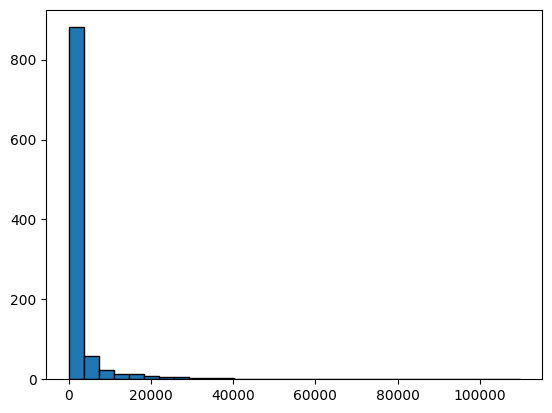

In [27]:
# Male Student Enrollment
plt.hist(data['TOT_ENR_M'], edgecolor='black', bins=30)

(array([885.,  55.,  21.,  13.,  12.,   8.,   7.,   6.,   3.,   4.,   0.,
          1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+01, 3.55376667e+03, 7.09753333e+03, 1.06413000e+04,
        1.41850667e+04, 1.77288333e+04, 2.12726000e+04, 2.48163667e+04,
        2.83601333e+04, 3.19039000e+04, 3.54476667e+04, 3.89914333e+04,
        4.25352000e+04, 4.60789667e+04, 4.96227333e+04, 5.31665000e+04,
        5.67102667e+04, 6.02540333e+04, 6.37978000e+04, 6.73415667e+04,
        7.08853333e+04, 7.44291000e+04, 7.79728667e+04, 8.15166333e+04,
        8.50604000e+04, 8.86041667e+04, 9.21479333e+04, 9.56917000e+04,
        9.92354667e+04, 1.02779233e+05, 1.06323000e+05]),
 <BarContainer object of 30 artists>)

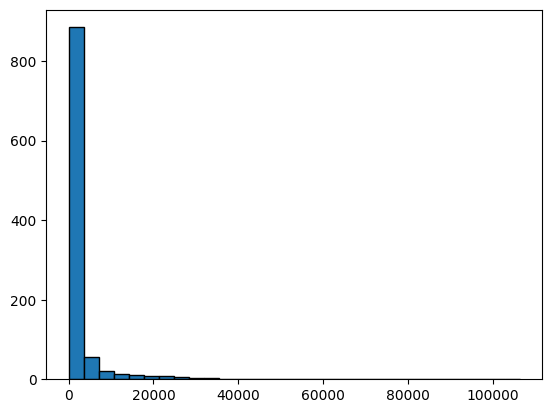

In [28]:
# Female Student Enrollment
plt.hist(data['TOT_ENR_F'], edgecolor='black', bins=30)

(array([883.,  56.,  22.,  13.,  12.,   8.,   6.,   7.,   3.,   2.,   2.,
          1.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.00000000e+01, 7.21896667e+03, 1.44179333e+04, 2.16169000e+04,
        2.88158667e+04, 3.60148333e+04, 4.32138000e+04, 5.04127667e+04,
        5.76117333e+04, 6.48107000e+04, 7.20096667e+04, 7.92086333e+04,
        8.64076000e+04, 9.36065667e+04, 1.00805533e+05, 1.08004500e+05,
        1.15203467e+05, 1.22402433e+05, 1.29601400e+05, 1.36800367e+05,
        1.43999333e+05, 1.51198300e+05, 1.58397267e+05, 1.65596233e+05,
        1.72795200e+05, 1.79994167e+05, 1.87193133e+05, 1.94392100e+05,
        2.01591067e+05, 2.08790033e+05, 2.15989000e+05]),
 <BarContainer object of 30 artists>)

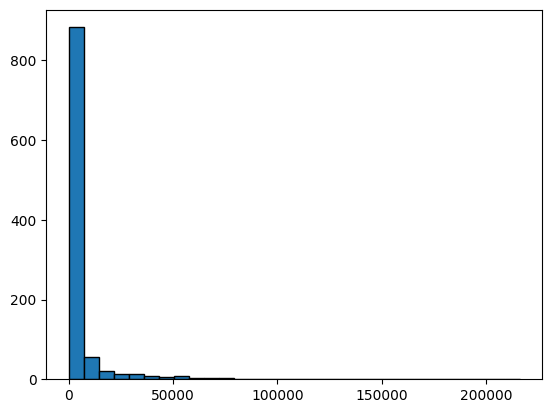

In [29]:
# Total Student Enrollment
plt.hist(data['TOT_ENR'], edgecolor='black', bins=30)

(array([  1.,   2.,   0.,  28.,   0.,  21.,  17.,   1.,  22.,   3.,  39.,
         37.,   3.,  45.,   1.,  69., 128.,   0.,  88.,   1.,  89.,  69.,
          1.,  57.,   4.,  51.,  76.,   0.,  41., 126.]),
 array([1.75 , 1.825, 1.9  , 1.975, 2.05 , 2.125, 2.2  , 2.275, 2.35 ,
        2.425, 2.5  , 2.575, 2.65 , 2.725, 2.8  , 2.875, 2.95 , 3.025,
        3.1  , 3.175, 3.25 , 3.325, 3.4  , 3.475, 3.55 , 3.625, 3.7  ,
        3.775, 3.85 , 3.925, 4.   ]),
 <BarContainer object of 30 artists>)

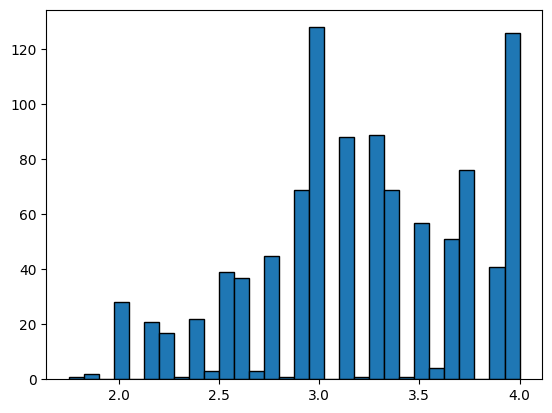

In [30]:
# Mean Rating
plt.hist(data['Mean_rating'], edgecolor='black', bins=30)

#### `Normal Assessment using QQplot`

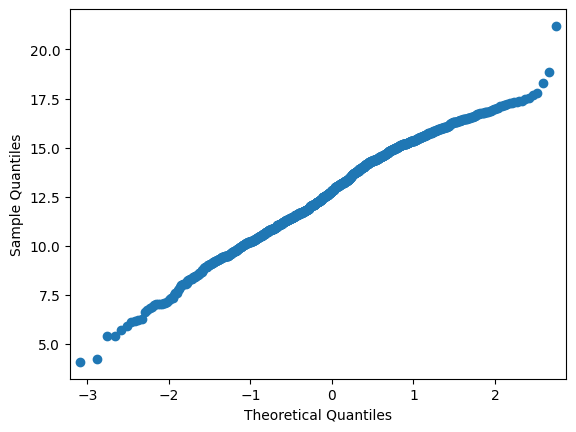

In [34]:
# Student to Teacher Ratio
fig = sm.qqplot(data['ptr'])
plt.show()

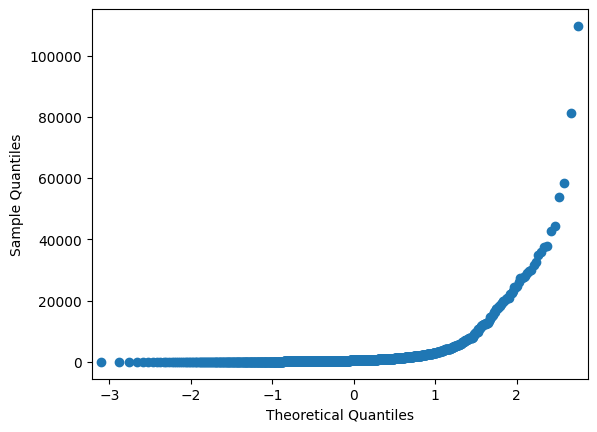

In [35]:
# Male Student Enrollment
fig = sm.qqplot(data['TOT_ENR_M'])
plt.show()

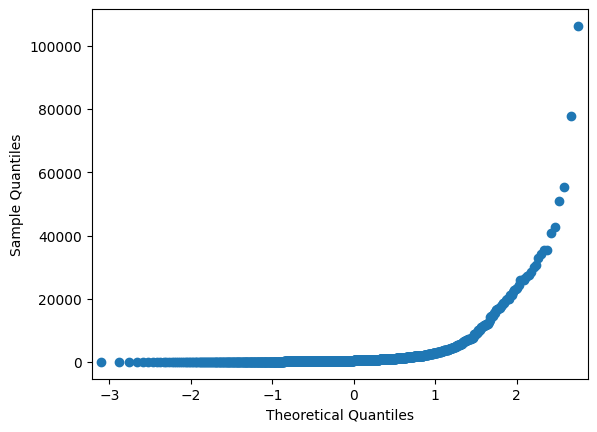

In [36]:
# Female Student Enrollment
fig = sm.qqplot(data['TOT_ENR_F'])
plt.show()

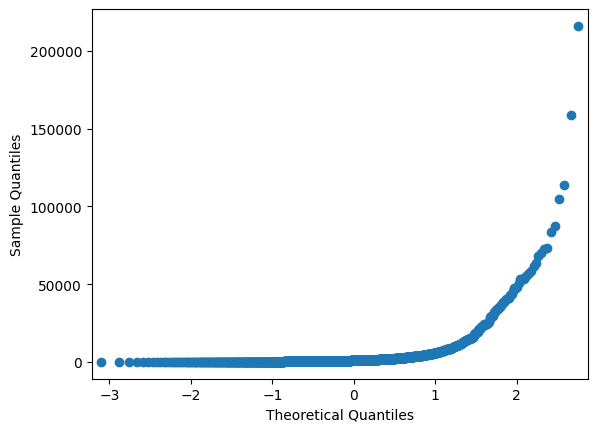

In [37]:
# Total Student Enrollment
fig = sm.qqplot(data['TOT_ENR'])
plt.show()

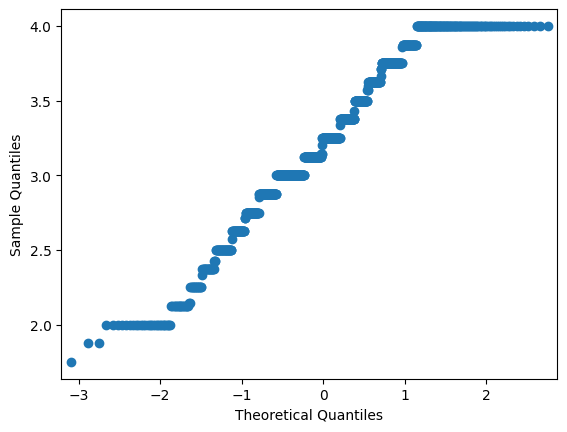

In [38]:
# Male Student Enrollment
fig = sm.qqplot(data['Mean_rating'])
plt.show()